<a href="https://colab.research.google.com/github/Abdullah-Sada/AI-Assignment/blob/main/Keras_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

problem 1

https://www.tensorflow.org/tutorials/images/cnn

In [1]:
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras import datasets, layers, models

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

11490434/11490434 [==============================] - 1s 0us/step


In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55744 (217.75 KB)
Trainable params: 55744 

In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

Model compilation and training

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 78s 38ms/step - loss: 0.1505 - accuracy: 0.9538 - val_loss: 0.0585 - val_accuracy: 0.9821
Epoch 2/5
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0474 - accuracy: 0.9854 - val_loss: 0.0551 - val_accuracy: 0.9835
Epoch 3/5
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0355 - accuracy: 0.9890 - val_loss: 0.0278 - val_accuracy: 0.9890
Epoch 4/5
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0269 - accuracy: 0.9913 - val_loss: 0.0297 - val_accuracy: 0.9896
Epoch 5/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0208 - accuracy: 0.9934 - val_loss: 0.0349 - val_accuracy: 0.9885


In [10]:
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# model.fit(train_images, train_labels, epochs=5)

Evaluate the model

313/313 - 3s - loss: 0.0349 - accuracy: 0.9885 - 3s/epoch - 9ms/step


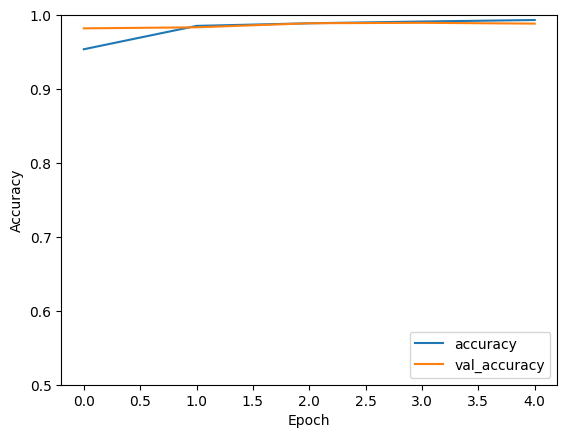

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [12]:
print(test_acc)

0.9884999990463257


Problem 3

In [17]:
import numpy as np
import pandas as pd
from keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.optimizers import Adam

dataset_path ="Iris.csv"
df = pd.read_csv(dataset_path)

df = df[(df["Species"] == "Iris-versicolor")|(df["Species"] == "Iris-virginica")]
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X)

y[y=='Iris-versicolor'] = 0
y[y=='Iris-virginica'] = 1
y = y.astype(np.int64)[:, np.newaxis]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [18]:
K.clear_session( )

In [19]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation = tf.nn.relu, input_shape=(4,)))
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.Dense(1, activation = tf.nn.sigmoid))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                250       
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 5451 (21.29 KB)
Trainable params: 5451 (21.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])
history = model.fit(X_train, y_train,
                    batch_size=10,
                    epochs=10,
                    verbose=1,
                    callbacks=[callback],
                    validation_data=(X_val, y_val))

Epoch 1/10
7/7 [==============================] - 1s 40ms/step - loss: 1.6050 - accuracy: 0.5000 - val_loss: 1.0814 - val_accuracy: 0.3750
Epoch 2/10
7/7 [==============================] - 0s 15ms/step - loss: 0.8204 - accuracy: 0.5000 - val_loss: 0.6063 - val_accuracy: 0.6250
Epoch 3/10
7/7 [==============================] - 0s 14ms/step - loss: 0.7054 - accuracy: 0.5469 - val_loss: 0.8157 - val_accuracy: 0.3750
Epoch 4/10
7/7 [==============================] - 0s 13ms/step - loss: 0.6389 - accuracy: 0.5781 - val_loss: 0.5941 - val_accuracy: 1.0000
Epoch 5/10
7/7 [==============================] - 0s 13ms/step - loss: 0.5591 - accuracy: 0.9531 - val_loss: 0.5233 - val_accuracy: 1.0000
Epoch 6/10
7/7 [==============================] - 0s 13ms/step - loss: 0.4984 - accuracy: 0.7812 - val_loss: 0.5109 - val_accuracy: 0.8125
Epoch 7/10
7/7 [==============================] - 0s 11ms/step - loss: 0.4934 - accuracy: 0.8281 - val_loss: 0.3905 - val_accuracy: 1.0000
Epoch 8/10
7/7 [===========

In [22]:
y_pred_proba = model.predict(X_test)[:, 0]
y_pred = np.where(y_pred_proba >0.5, 1, 0)
print("y_pred_proba", y_pred_proba)
print("y_pred", y_pred)
print('y_test', y_test.ravel())

1/1 [==============================] - 0s 135ms/step
y_pred_proba [0.15274711 0.832432   0.12649208 0.8953761  0.60587966 0.8520507
 0.26830423 0.52713305 0.8850416  0.6845755  0.76998514 0.79185283
 0.8682369  0.22514826 0.06997611 0.1060035  0.4553578  0.06671404
 0.6152095  0.09443584]
y_pred [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0]
y_test [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0]


In [23]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.2758260667324066
Train accuracy: 0.949999988079071


Problen 4

In [24]:
from sklearn.preprocessing import OneHotEncoder

In [27]:
dataset_path ="Iris.csv"
df = pd.read_csv(dataset_path)

y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X)

y[y=='Iris-setosa'] = 0
y[y=='Iris-versicolor'] = 1
y[y=='Iris-virginica'] = 2
y = y.astype(np.int64)[:, np.newaxis]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)


enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train)
y_val_one_hot = enc.transform(y_val)
y_test_one_hot = enc.transform(y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [28]:
K.clear_session( )
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation = tf.nn.relu, input_shape=(4,)))
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.Dense(3, activation = tf.nn.softmax))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                250       
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dense_2 (Dense)             (None, 3)                 303       
                                                                 
Total params: 5653 (22.08 KB)
Trainable params: 5653 (22.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

history = model.fit(X_train, y_train_one_hot,
                    batch_size=10,
                    epochs=10,
                    verbose=0,
                    validation_data=(X_val, y_val_one_hot))

In [31]:
y_pred_proba = model.predict(X_test)[:, 0]
y_pred = np.where(y_pred_proba >0.5, 1, 0)

print("y_pred_proba", y_pred_proba)
print("y_pred", y_pred)
print('y_test', y_test.ravel())

1/1 [==============================] - 0s 139ms/step
y_pred_proba [2.9782615e-10 9.9936523e-04 9.9971128e-01 1.0123770e-09 9.9835241e-01
 2.8907697e-12 9.9899930e-01 2.6596029e-04 1.2752468e-04 1.9816807e-03
 1.6823668e-08 5.6970998e-04 1.7628746e-04 1.6648376e-04 1.1931917e-04
 9.9744713e-01 1.9031641e-04 1.8384955e-04 9.9691743e-01 9.9954540e-01
 2.3380959e-08 1.1310597e-04 9.9502724e-01 9.9536538e-01 6.8343825e-06
 9.9932325e-01 9.9771392e-01 8.7537017e-04 8.7033641e-03 9.9767929e-01]
y_pred [0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1]
y_test [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


In [32]:
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
print("y_pred", y_pred)
print('y_test', y_test.ravel())

1/1 [==============================] - 0s 47ms/step
y_pred [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
y_test [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


In [33]:
score = model.evaluate(X_test, y_test_one_hot, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.05948422849178314
Train accuracy: 1.0


problem 5

In [36]:
from sklearn.preprocessing import StandardScaler

train = pd.read_csv('Housing_train.csv')

x = train[['GrLivArea', 'YearBuilt']]
y = train[['SalePrice']]

x = np.log(x).values
y = np.log(y).values

sc = StandardScaler()
sc.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [37]:
K.clear_session( )

In [38]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation = tf.nn.relu, input_shape=(2,)))
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.Dense(1, activation = tf.keras.activations.linear))

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                150       
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 5351 (20.90 KB)
Trainable params: 5351 (20.90 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
model.compile(loss='mse',
              optimizer=tf.optimizers.Adam(learning_rate=0.01),
              metrics=['mse'])
history = model.fit(X_train, y_train,
                    batch_size=10,
                    epochs=20,
                    verbose=1,
                    callbacks=[callback],
                    validation_data=(X_val, y_val))

Epoch 1/20
94/94 [==============================] - 2s 9ms/step - loss: 4.4004 - mse: 4.4004 - val_loss: 0.0881 - val_mse: 0.0881
Epoch 2/20
94/94 [==============================] - 1s 6ms/step - loss: 0.0879 - mse: 0.0879 - val_loss: 0.0810 - val_mse: 0.0810
Epoch 3/20
94/94 [==============================] - 0s 5ms/step - loss: 0.0901 - mse: 0.0901 - val_loss: 0.0966 - val_mse: 0.0966
Epoch 4/20
94/94 [==============================] - 0s 3ms/step - loss: 0.0869 - mse: 0.0869 - val_loss: 0.0744 - val_mse: 0.0744
Epoch 5/20
94/94 [==============================] - 0s 4ms/step - loss: 0.0784 - mse: 0.0784 - val_loss: 0.0705 - val_mse: 0.0705
Epoch 6/20
94/94 [==============================] - 0s 3ms/step - loss: 0.0920 - mse: 0.0920 - val_loss: 0.0761 - val_mse: 0.0761
Epoch 7/20
94/94 [==============================] - 0s 5ms/step - loss: 0.0894 - mse: 0.0894 - val_loss: 0.0756 - val_mse: 0.0756
Epoch 8/20
94/94 [==============================] - 0s 4ms/step - loss: 0.0869 - mse: 0.08

In [41]:
y_pred_proba = model.predict(X_test)
y_pred = y_pred_proba
print("y_pred", y_pred.ravel()[:5])
print('y_test', y_test.ravel()[:5])

10/10 [==============================] - 0s 2ms/step
y_pred [12.64445  12.242982 12.016496 12.467284 11.94265 ]
y_test [12.20918779 11.79810441 11.60823564 12.16525065 11.38509209]


In [42]:
score = model.evaluate(X_test, y_test, verbose=0)
print('loss (test):', score[0])
print('Mean Squared Error (test):', score[1])

loss (test): 0.0874139741063118
Mean Squared Error (test): 0.0874139741063118


problem 6

In [45]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)
X_train /= 255
X_test /= 255

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_val_one_hot = enc.transform(y_val[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [46]:
K.clear_session( )

In [47]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation = tf.nn.relu, input_shape=(784,)))
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 45360 (177.19 KB)
Trainable params: 45360 (177.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.005),
              metrics=['accuracy'])
history = model.fit(X_train, y_train_one_hot,
                    batch_size=20,
                    epochs=5,
                    verbose=1,
                    validation_data=(X_val, y_val_one_hot))

Epoch 1/5
2400/2400 [==============================] - 10s 4ms/step - loss: 0.2955 - accuracy: 0.9130 - val_loss: 0.2226 - val_accuracy: 0.9353
Epoch 2/5
2400/2400 [==============================] - 7s 3ms/step - loss: 0.1868 - accuracy: 0.9456 - val_loss: 0.1921 - val_accuracy: 0.9466
Epoch 3/5
2400/2400 [==============================] - 9s 4ms/step - loss: 0.1532 - accuracy: 0.9564 - val_loss: 0.1894 - val_accuracy: 0.9475
Epoch 4/5
2400/2400 [==============================] - 8s 3ms/step - loss: 0.1367 - accuracy: 0.9603 - val_loss: 0.1590 - val_accuracy: 0.9582
Epoch 5/5
2400/2400 [==============================] - 9s 4ms/step - loss: 0.1260 - accuracy: 0.9633 - val_loss: 0.2081 - val_accuracy: 0.9507


In [50]:
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
print("y_pred", y_pred[:10])
print('y_test', y_test.ravel()[:10])

313/313 [==============================] - 1s 2ms/step
y_pred [7 2 1 0 4 1 4 9 5 9]
y_test [7 2 1 0 4 1 4 9 5 9]


In [51]:
score = model.evaluate(X_test, y_test_one_hot, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.15516124665737152
Test accuracy: 0.9599999785423279
